In [1]:
#import needed libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
from matplotlib import style
%matplotlib inline
style.use('ggplot')

In [2]:
#read the data set...
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
sm=df.loc[0].tolist()
sm.pop()
sm

[9046,
 'Male',
 67.0,
 0,
 1,
 'Yes',
 'Private',
 'Urban',
 228.69,
 36.6,
 'formerly smoked']

In [3]:
#getting the some information about the data set...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#checking for missing values....
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

<AxesSubplot:>

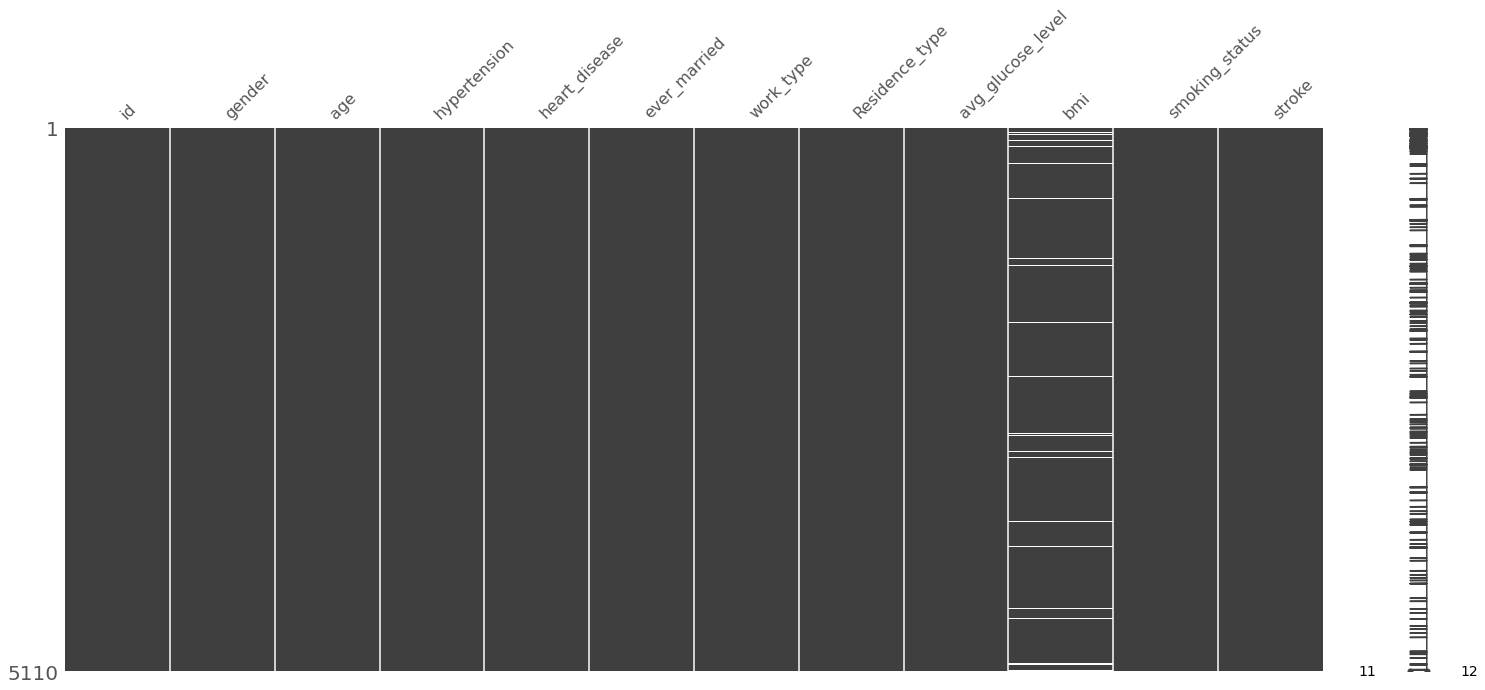

In [6]:
import missingno
missingno.matrix(df)

In [7]:
#here we have only bmi column has some missing values....
#before filling the missing values, checking the distribution of the bmi feature...
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df[['bmi']].iplot(kind='hist',bins=30)
plt.show()

In [8]:
#plot look like normal ditribution so i filling missing values with mean value...
mean=df['bmi'].mean()
df1=df.copy()
df1['bmi']=df1['bmi'].fillna(mean)

In [9]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#id column is not required...
df1.drop('id',axis=1,inplace=True)

In [12]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [13]:
#taking only numerical columns for analysis....
numeric_df=df1.select_dtypes(exclude='O')
numeric_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


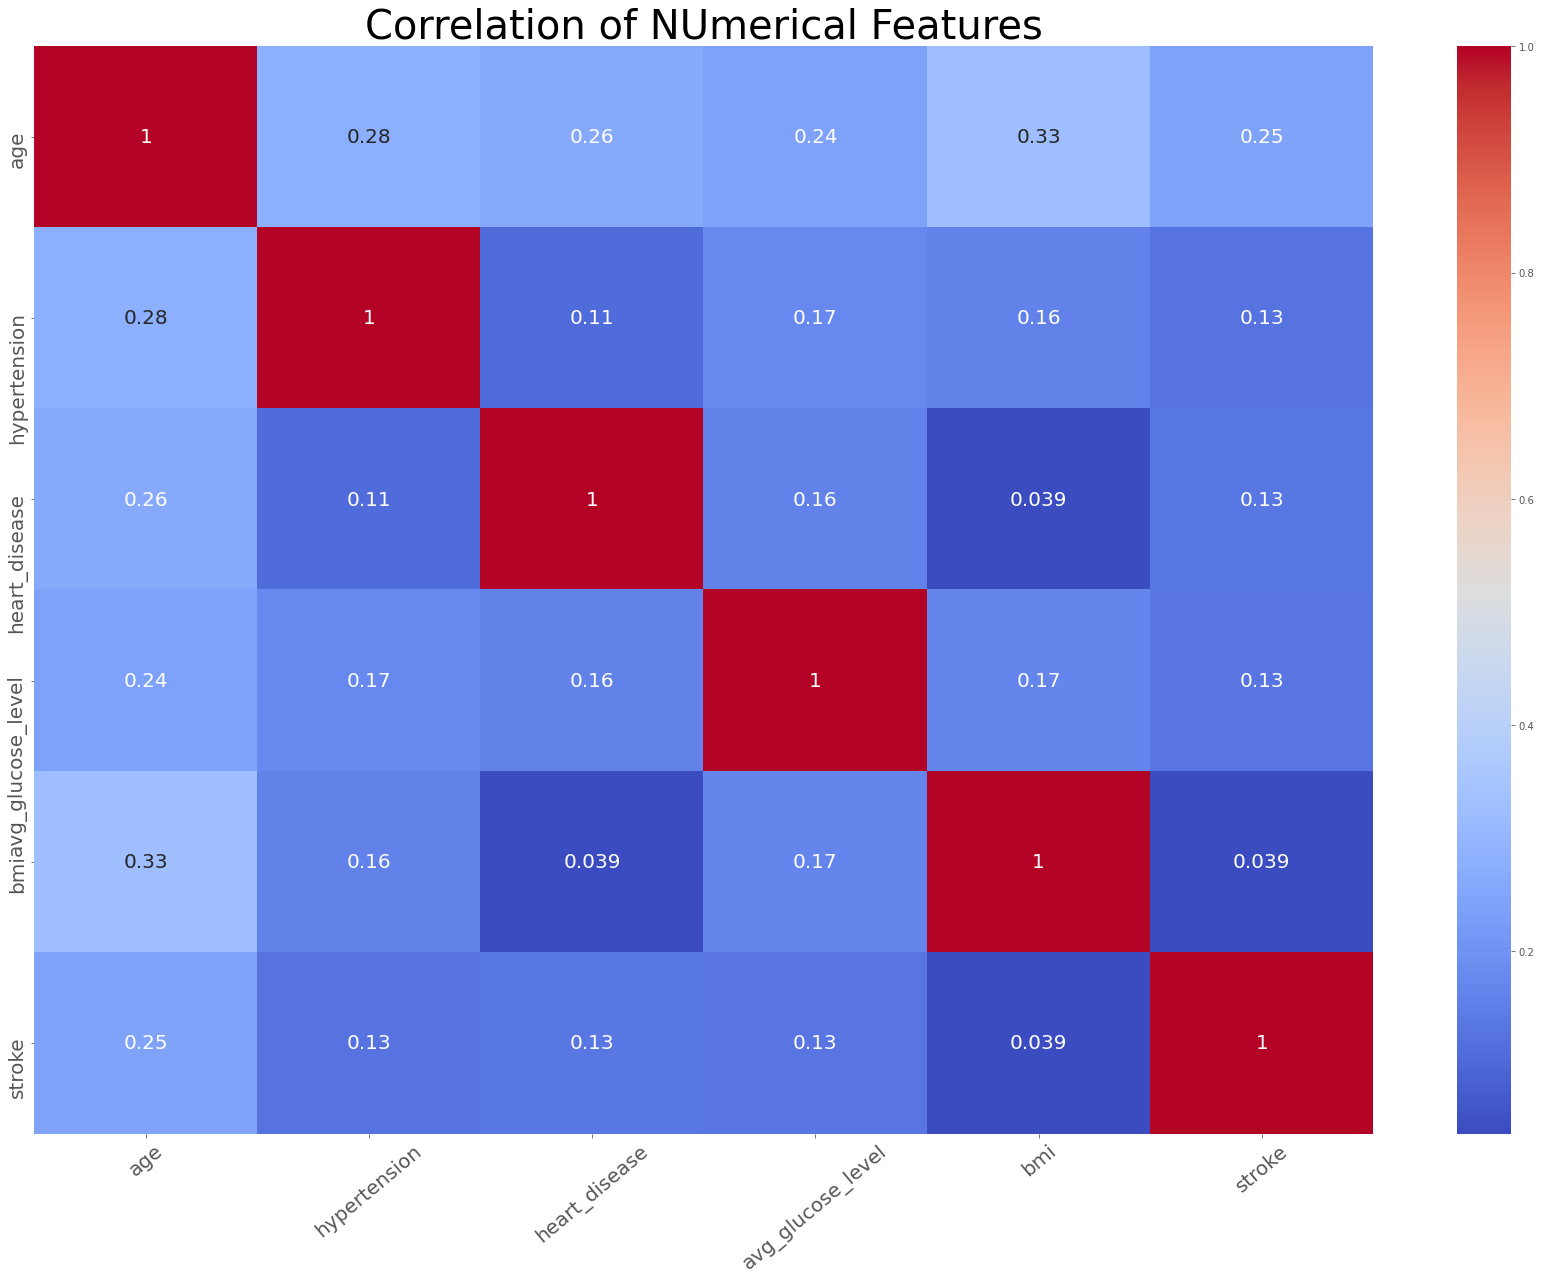

In [14]:
#visulzing the correlation of numeric features with our dependent  stroke fetaure...
plt.figure(figsize=(30,20))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True,annot_kws=dict(size=20))
plt.title("Correlation of NUmerical Features",size=40)
plt.xticks(size=20,rotation=40)
plt.yticks(size=20)
plt.show()

In [93]:
#here we clearly see that no features are strongly corellated with our dependent variable stroke...
#the highest positive corellated feature is age and no negative correlation has present yet ...

<Figure size 1152x720 with 0 Axes>

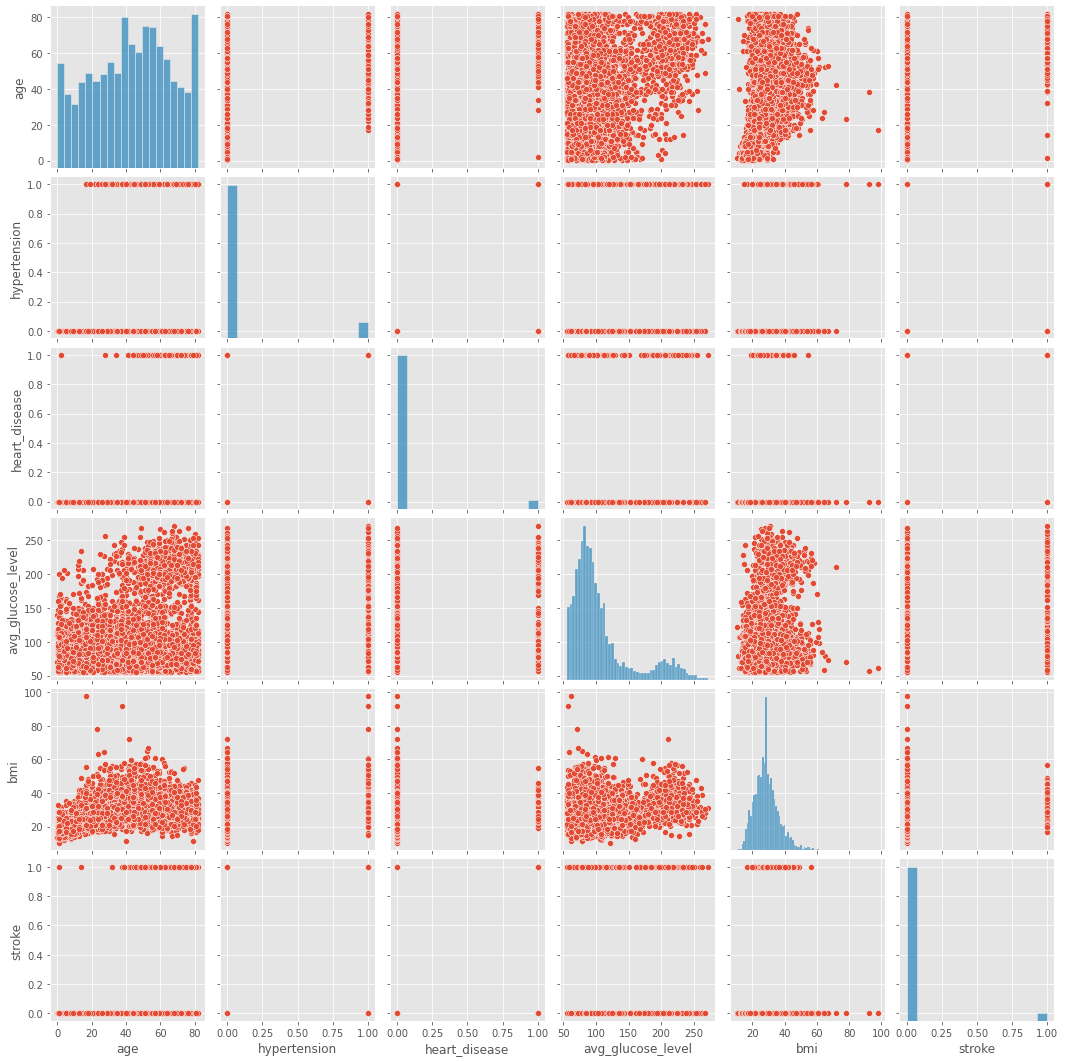

In [16]:
#plotting the distribution of  all numeric features ...
plt.figure(figsize=(16,10))
sns.pairplot(numeric_df)
plt.show()

In [17]:
#visulizing the distirbution of age
numeric_df['age'].iplot(kind='hist',bins=30)
plt.show()

<AxesSubplot:ylabel='Density'>

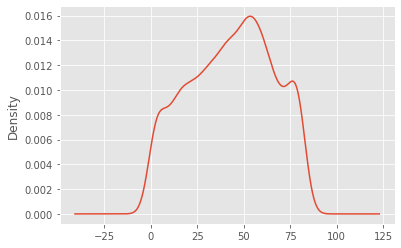

In [18]:
numeric_df['age'].plot(kind='kde')

<AxesSubplot:>

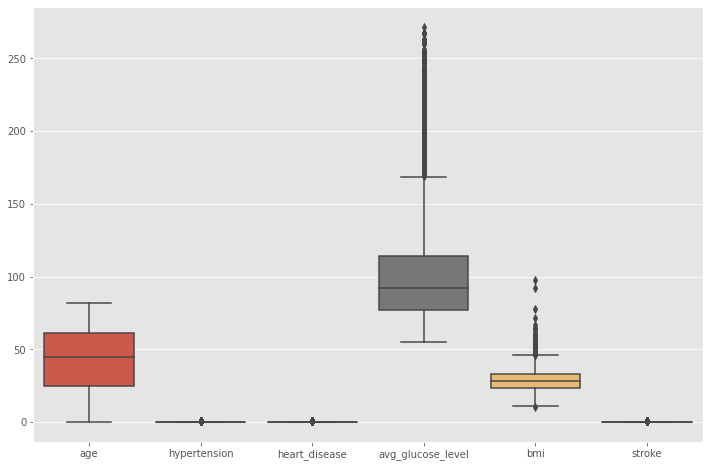

In [44]:
#checking for outliers with the help of box plotb
plt.figure(figsize=(12,8))
sns.boxplot(data=numeric_df)

### Now Going for Categorical features...

In [19]:
categorical_df=df1.select_dtypes(include='O')
categorical_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [20]:
#checking every features unique values...
for feature in categorical_df:
    print(f"unique values of {feature} are\n {categorical_df[feature].unique()}\n______________________________")

unique values of gender are
 ['Male' 'Female' 'Other']
______________________________
unique values of ever_married are
 ['Yes' 'No']
______________________________
unique values of work_type are
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
______________________________
unique values of Residence_type are
 ['Urban' 'Rural']
______________________________
unique values of smoking_status are
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
______________________________


In [21]:
#checking gender_vise relation with stroke ...
def stroke_count_cat(data,x):
    result=data.groupby(x)['stroke'].count().to_frame()
    return result.style.background_gradient(cmap='Reds')
    

In [22]:
gender_vised=stroke_count_cat(df1,'gender')
gender_vised

,stroke
gender,
Female,2994
Male,2115
Other,1


In [23]:
stroke_count_cat(df1,'ever_married')

,stroke
ever_married,
No,1757
Yes,3353


In [24]:
stroke_count_cat(df1,'work_type')

,stroke
work_type,
Govt_job,657
Never_worked,22
Private,2925
Self-employed,819
children,687


In [25]:
stroke_count_cat(df1,'Residence_type')

,stroke
Residence_type,
Rural,2514
Urban,2596


In [26]:
stroke_count_cat(df1,'smoking_status')

,stroke
smoking_status,
Unknown,1544
formerly smoked,885
never smoked,1892
smokes,789


In [27]:
#visulizing job_vise...
jobvised=df1.groupby('work_type')['stroke'].count().to_frame().reset_index()
jobvised


,work_type,stroke
0,Govt_job,657
1,Never_worked,22
2,Private,2925
3,Self-employed,819
4,children,687


In [28]:
fig=px.bar(jobvised,jobvised.work_type,jobvised['stroke'],color='work_type',hover_name='work_type',
          )
fig.update_layout(title='Stroke Count Based on Work Type')
fig.show()

In [29]:
smoking=df1.groupby('smoking_status')['stroke'].count().to_frame().reset_index()
smoking

,smoking_status,stroke
0,Unknown,1544
1,formerly smoked,885
2,never smoked,1892
3,smokes,789


In [30]:
fig=go.Figure()
fig.add_trace(go.Bar(x=smoking['smoking_status'],y=smoking['stroke']))


In [31]:
fig=px.pie(smoking,names=smoking['smoking_status'],values=smoking['stroke'])
fig.show()

In [32]:
#now encoding of categorical features for model building ....
categorical_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [34]:
categorical_df_enc=pd.get_dummies(categorical_df)
categorical_df_enc.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [35]:
final_data=pd.concat([numeric_df,categorical_df_enc],axis=1)
final_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [36]:
final_data.shape

(5110, 22)

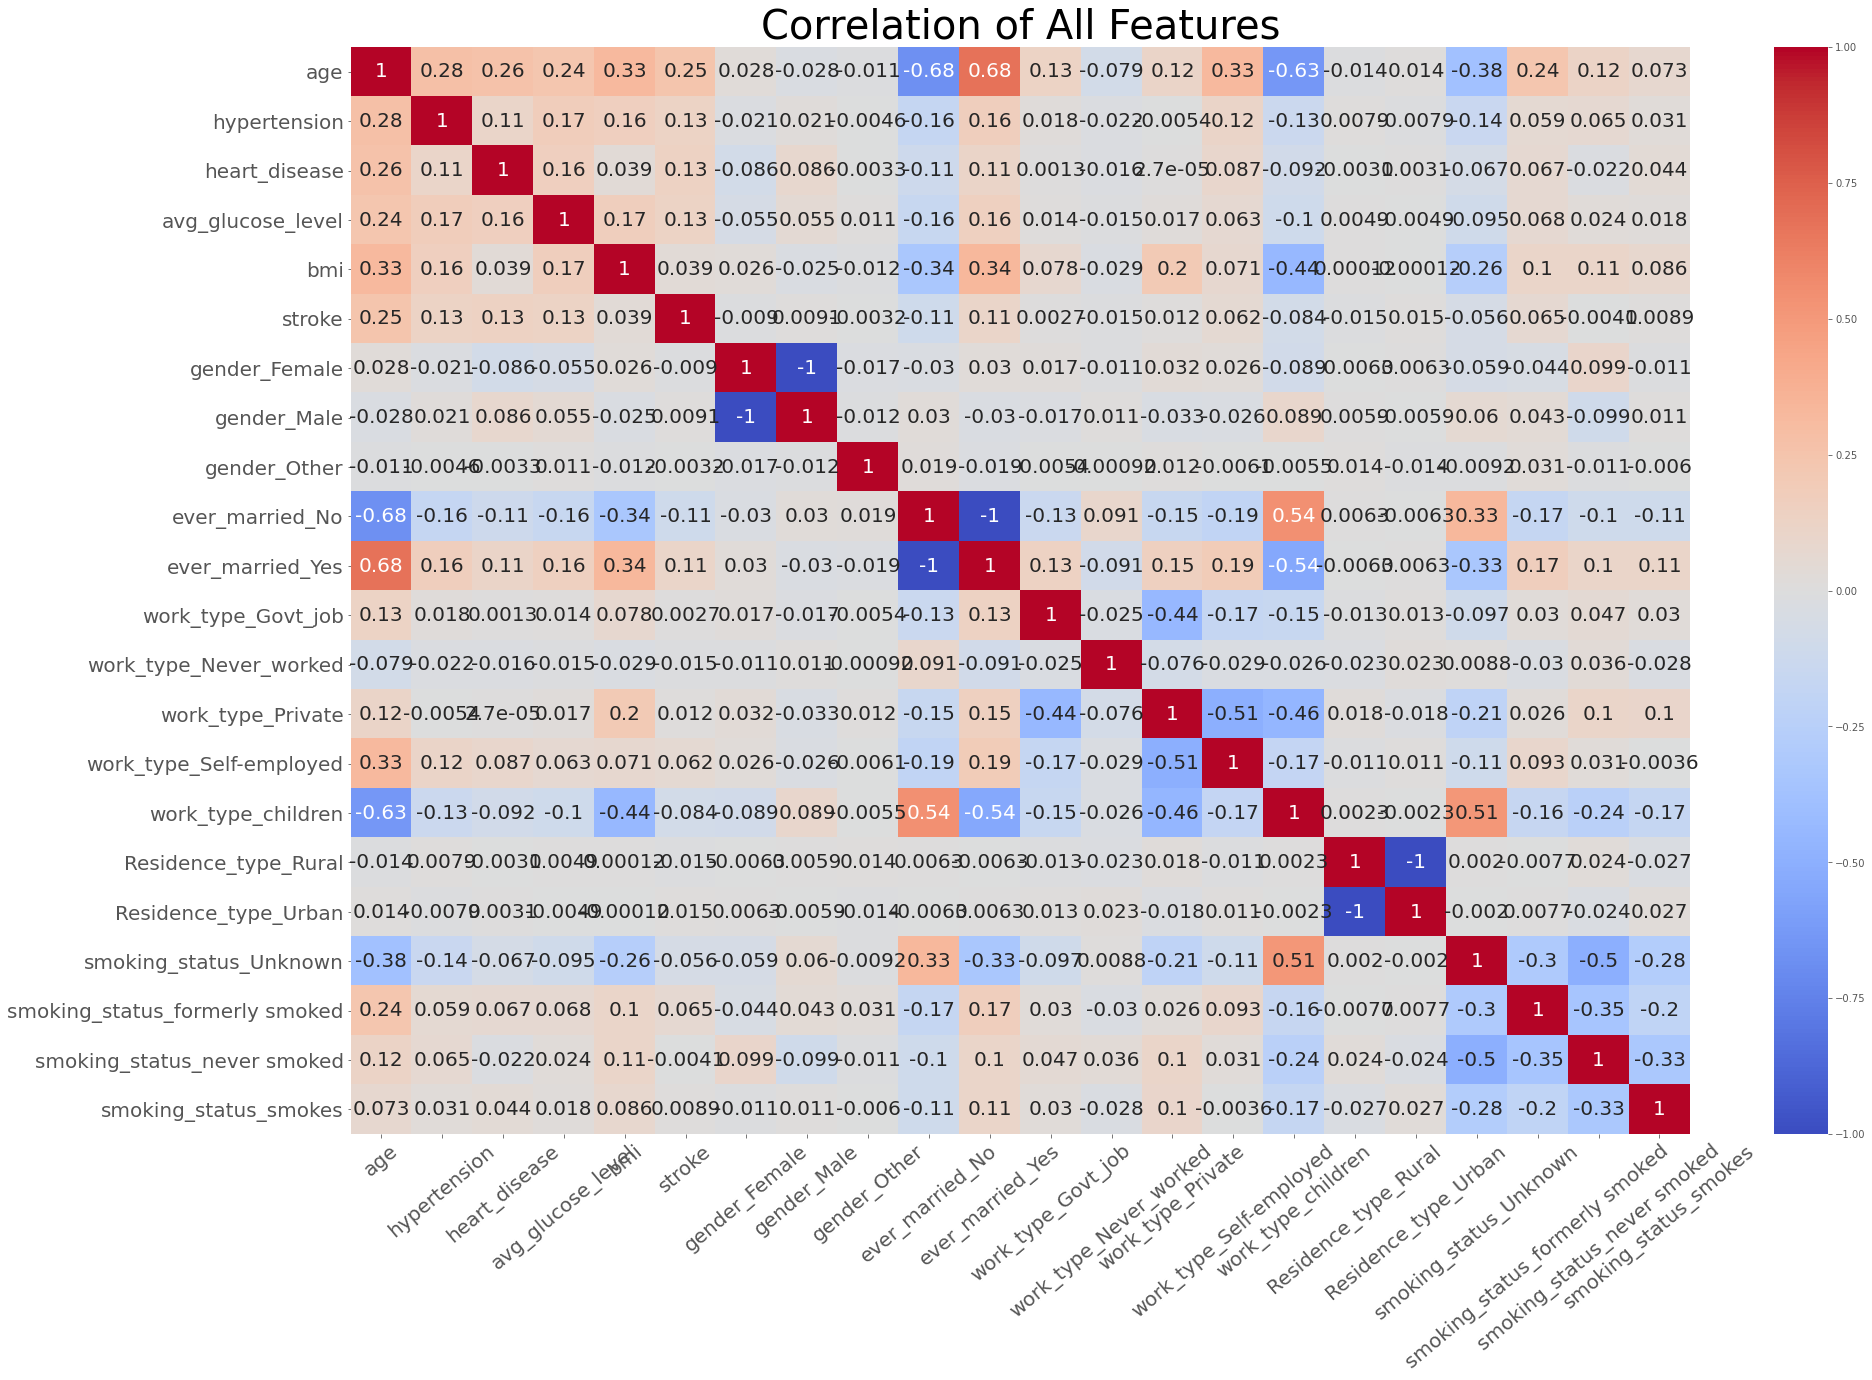

In [37]:
corr=final_data.corr()
#visulzing the correlation of all features with our dependent  stroke fetaure...
plt.figure(figsize=(30,20))
sns.heatmap(corr,cmap='coolwarm',annot=True,annot_kws=dict(size=20))
plt.title("Correlation of All Features",size=40)
plt.xticks(size=20,rotation=40)
plt.yticks(size=20)
plt.show()

In [39]:
X=final_data.drop('stroke',axis=1)
y=final_data.stroke

In [96]:
X.corrwith(y).sort_values(ascending=False)

age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
Residence_type_Rural             -0.015458
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
ever_married_No                  -0.108340
dtype: float64

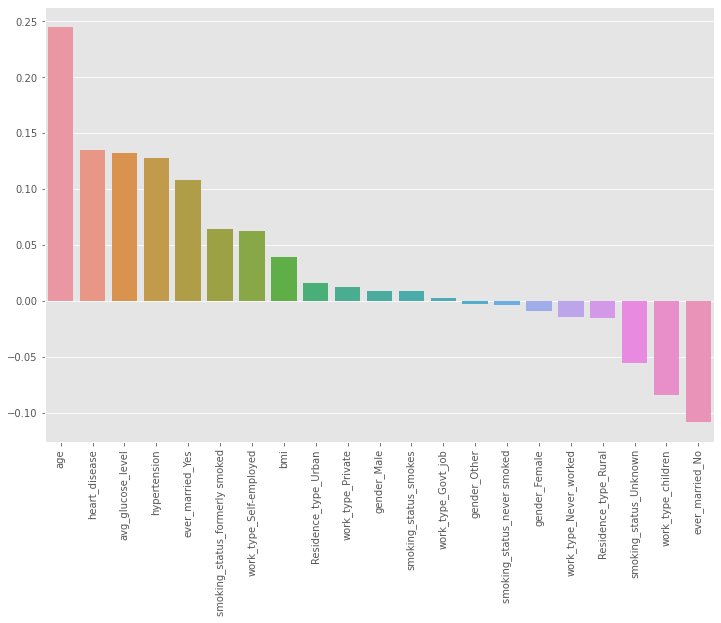

In [97]:
plt.figure(figsize=(12,8))
sns.barplot(x=X.corrwith(y).sort_values(ascending=False).index,y=X.corrwith(y).sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

In [99]:
final_data.to_csv('clean_data.csv',index=False)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])